# Reaction flux fit

In [5]:
import pandas as pd
import cobra
import alloregfit as arf
import matplotlib.pyplot as plt
import numpy as np

Load data and model:

In [2]:
data_dir = "C:/Users/user/polybox/MASTER/THESIS/2_new_simmer_test/"
model = cobra.io.sbml.create_cobra_model_from_sbml_file(data_dir+"ecoli_core_model.xml")
fluxes = pd.read_excel(data_dir+"fluxes.xlsx",index_col="name")
fluxes_sd = pd.read_excel(data_dir+"fluxes.xlsx",sheetname=1,index_col="name")
metabolites = pd.read_excel(data_dir+"metabolites.xlsx",index_col="name")
proteins = pd.read_excel(data_dir+"proteins.xlsx",index_col="name")
rxn_id = open(data_dir+'reactions.txt').read().splitlines()
reg_coli = pd.read_csv(data_dir+"SMRN.csv",index_col="rxn_id")

Run alloregfit to obtain the predicted flux estimation:

In [3]:
summary,bools = arf.define_reactions(rxn_id,model,fluxes,proteins,metabolites)
candidates = arf.define_candidates(rxn_id,reg_coli,metabolites,bools)
markov_par = {'freq':20,'nrecord':200,'burn_in':0}
results = arf.fit_reactions(summary,model,markov_par)
results

Running MCMC-NNLS for reaction 0... Candidate regulator: 
Running MCMC-NNLS for reaction 1... Candidate regulator: 
Running MCMC-NNLS for reaction 2... Candidate regulator: 
Running MCMC-NNLS for reaction 3... Candidate regulator: 
Running MCMC-NNLS for reaction 4... Candidate regulator: 
Running MCMC-NNLS for reaction 5... Candidate regulator: 
Running MCMC-NNLS for reaction 6... Candidate regulator: 
Running MCMC-NNLS for reaction 7... Candidate regulator: 


,reaction,rxn_id,regulator,equation,meas_flux,pred_flux,best_fit,best_lik
idx,,,,,,,,
2.0,mal_L_c + nad_c <=> h_c + nadh_c + oaa_c,MDH,,"{'vmax': K_cat_mdh*c_mdh, 'occu': (c_mal_L_c**...",Acetate Fructose Galactose Glucose G...,"[[[1.38725323607, 2.23535359045, -0.5167504072...",K_mal_L_c K_nad_c K_eq K_nadh_c ...,-23.389181
3.0,atp_c + f6p_c --> adp_c + fdp_c + h_c,PFK,,"{'vmax': K_cat_pfkA*c_pfkA, 'occu': (c_atp_c**...",Acetate Fructose Galactose Glucose ...,"[[[-0.142325462152, 0.270181127045, -0.3242231...",K_atp_c K_f6p_c K_eq K_ad...,-22.529470
4.0,g6p_c <=> f6p_c,PGI,,"{'vmax': K_cat_pgi*c_pgi, 'occu': (c_g6p_c**1....",Acetate Fructose Galactose Glucose G...,"[[[-0.420696783287, -0.382109813506, -1.025489...",K_g6p_c K_eq K_f6p_c kcat 58 ...,-21.745202
5.0,atp_c + h2o_c + pyr_c --> amp_c + 2.0 h_c + pe...,PPS,,"{'vmax': K_cat_ppsA*c_ppsA, 'occu': (c_atp_c**...",Acetate Fructose Galactose Glucose ...,"[[[-0.72326941242, 1.17309692249, 0.0091093632...",K_atp_c K_pyr_c K_eq ...,-21.346657
1.0,6pgc_c + nadp_c --> co2_c + nadph_c + ru5p_D_c,GND,,"{'vmax': K_cat_gnd*c_gnd, 'occu': (c_6pgc_c**1...",Acetate Fructose Galactose Glucose ...,"[[[1.26443241609, 1.02985511842, -1.4762918230...",K_6pgc_c K_nadp_c K_eq K_nadph...,-20.329249
6.0,adp_c + h_c + pep_c --> atp_c + pyr_c,PYK,,"{'vmax': K_cat_pykF*c_pykF, 'occu': (c_adp_c**...",Acetate Fructose Galactose Glucose ...,"[[[0.347415855008, 2.89735715294, 0.9913031270...",K_adp_c K_pep_c K_eq K_atp_...,-19.943938
7.0,r5p_c <=> ru5p_D_c,RPI,,"{'vmax': K_cat_rpiA*c_rpiA, 'occu': c_r5p_c**1...",Acetate Fructose Galactose Glucose ...,"[[[-0.057191739185, -0.0497344241662, -0.24216...",K_r5p_c kcat 114 6.34199 17.945065,-13.543631
0.0,fum_c + h2o_c <=> mal_L_c,FUM,,"{'vmax': K_cat_fumA*c_fumA, 'occu': (c_fum_c**...",Acetate Fructose Galactose Glucose ...,"[[[8.46959824052, 2.37144088011, 1.49050968692...",K_fum_c K_eq K_mal_L_c ...,-10.066056


In [67]:
def plot_fit(idx,results,fluxes_sd):
    react = results.loc[idx];
    meas_flux = summary['flux'][idx].values
    meas_flux_sd = fluxes_sd.loc[summary['rxn_id'][idx],summary['flux'][idx].columns]
    pred_flux = react['pred_flux']
    ind = np.arange(meas_flux.shape[1])
    width = 0.35
    fig, ax = plt.subplots()
    rects1 = ax.bar(ind, meas_flux.reshape(ind.shape), width, color='r', yerr=meas_flux_sd)
    rects2 = ax.bar(ind + width, pred_flux[0].reshape(ind.shape), width, color='y')
    ax.set_ylabel('Flux (mmol*gCDW-1*h-1)')
    ax.set_title('%s: Flux fit between predicted and measured data' % results['rxn_id'][idx])
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels(list(summary['flux'][idx].columns),rotation = 30, ha="right")
    ax.legend((rects1, rects2), ('Measured', 'Predicted'))
    plt.show()

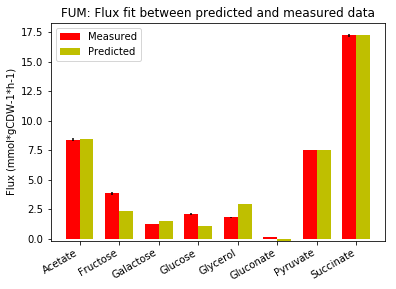

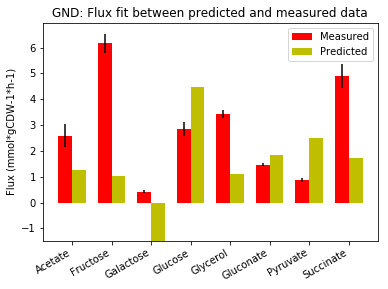

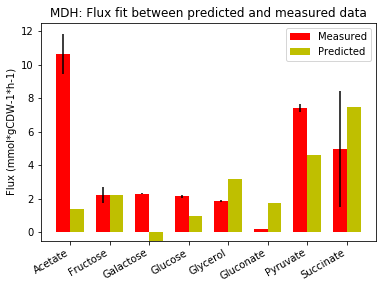

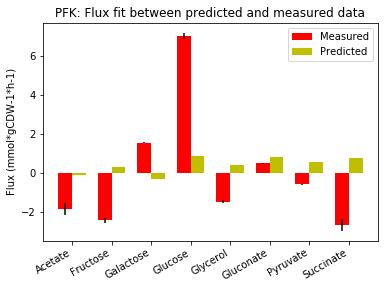

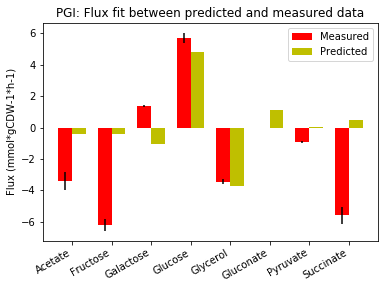

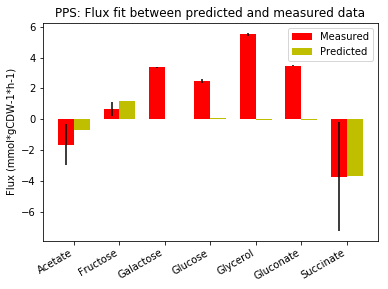

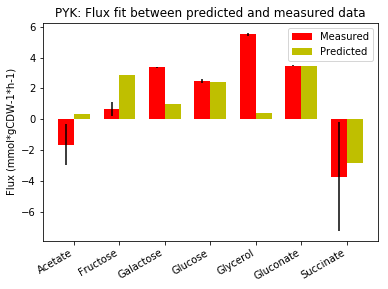

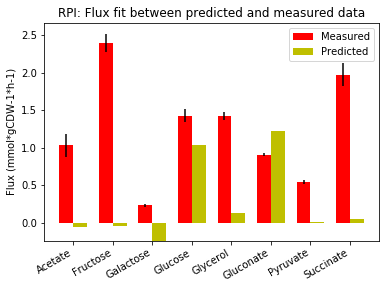

In [68]:
for i in list(summary.index):
    plot_fit(i,results,fluxes_sd)